In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [145]:
data=pd.read_csv("/Users/tenzinchoetso/Manipal_python/TB_data.csv")
data
data.columns

Index(['_id', 'Year', 'Category', 'Strata', 'Cases', 'Population',
       'Rate per 100,000 population'],
      dtype='object')

In [146]:
data
#this data has a lot of NaN values,we drop the NaN
#instead NaN is replaced with 0.0 so we query data where poulation is not equal to 0.0 which eliminated NaN value completely

data=data.dropna(axis=0,how='all')
data=data.query("Population!=0.0")
data


,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
0,1,2005,Total,All cases,2897.0,35985582.0,8.1
1,2,2006,Total,All cases,2776.0,36246822.0,7.7
2,3,2007,Total,All cases,2722.0,36552529.0,7.4
3,4,2008,Total,All cases,2695.0,36856222.0,7.3
4,5,2009,Total,All cases,2466.0,37077204.0,6.7
...,...,...,...,...,...,...,...
349,350,2021,Origin,non-US-born,1429.0,10470637.0,13.6
350,351,2021,Origin,unknown,12.0,NaN,NaN
351,352,2022,Origin,US-born,310.0,28699610.0,1.1
352,353,2022,Origin,non-US-born,1527.0,10446663.0,14.6


In [147]:
data.columns
#list out all the columns

Index(['_id', 'Year', 'Category', 'Strata', 'Cases', 'Population',
       'Rate per 100,000 population'],
      dtype='object')

In [148]:
#the data is clustered with different categorys,and it is super messy
#my goal is to make separate data based on Category
data_race=data.query("Category=='Race/ethnicity'")
data_race



,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
18,19,2005,Race/ethnicity,white,267.0,15716066.0,1.7
19,20,2005,Race/ethnicity,black,224.0,2220269.0,10.1
20,21,2005,Race/ethnicity,hispanic,1127.0,12667790.0,8.9
21,22,2005,Race/ethnicity,asian,1253.0,4314290.0,29.0
22,23,2005,Race/ethnicity,amerind/natalask,4.0,171253.0,NaN
...,...,...,...,...,...,...,...
149,150,2022,Race/ethnicity,amerind/natalask,4.0,159711.0,NaN
150,151,2022,Race/ethnicity,natHW/PacIsl,11.0,145719.0,7.5
151,152,2022,Race/ethnicity,other,14.0,NaN,NaN
152,153,2022,Race/ethnicity,multirace,4.0,1163682.0,NaN


In [149]:
data_white=data_race.query("Strata=='white'")
data_black=data_race.query("Strata=='black'")
data_asian=data_race.query("Strata=='asian'")
data_hispanic=data_race.query("Strata=='hispanic'")



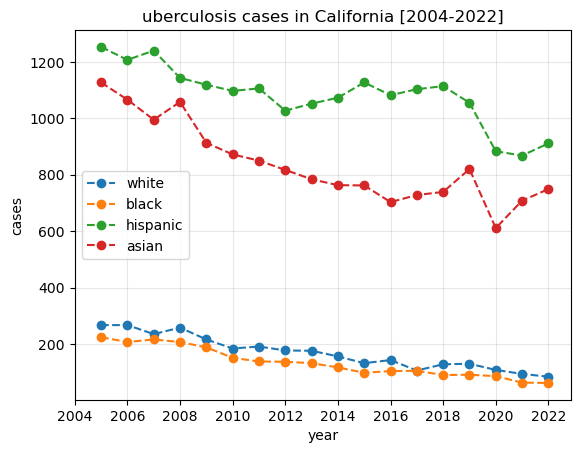

In [150]:
plt.plot("Year","Cases","o--",data=data_white)
plt.plot("Year","Cases","o--",data=data_black)
plt.plot("Year","Cases","o--",data=data_asian)
plt.plot("Year","Cases","o--",data=data_hispanic)
plt.xticks([2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.xlabel("year")
plt.ylabel("cases")
plt.title("uberculosis cases in California [2004-2022]")
plt.legend([ "white","black","hispanic","asian"])
plt.grid(alpha=0.3)

In [151]:
#first dataframe made out of original data is by filtering category based on Origin 
# and Population values other than 0 which is the NaN value, we're getting rid of NaN values
data_origin=data.query("Category=='Origin'")
data_origin

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
300,301,2005,Origin,US-born,653.0,26161728.0,2.5
301,302,2005,Origin,non-US-born,2228.0,9823854.0,22.7
302,303,2005,Origin,unknown,16.0,NaN,NaN
303,304,2006,Origin,US-born,635.0,26421487.0,2.4
304,305,2006,Origin,non-US-born,2128.0,9825335.0,21.7
305,306,2006,Origin,unknown,13.0,NaN,NaN
306,307,2007,Origin,US-born,595.0,26538303.0,2.2
307,308,2007,Origin,non-US-born,2107.0,10014226.0,21.0
308,309,2007,Origin,unknown,20.0,NaN,NaN
309,310,2008,Origin,US-born,669.0,26973243.0,2.5


In [152]:
data_us_born=data_origin.query('Strata=="US-born"')
data_us_born

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
300,301,2005,Origin,US-born,653.0,26161728.0,2.5
303,304,2006,Origin,US-born,635.0,26421487.0,2.4
306,307,2007,Origin,US-born,595.0,26538303.0,2.2
309,310,2008,Origin,US-born,669.0,26973243.0,2.5
312,313,2009,Origin,US-born,580.0,27114909.0,2.1
315,316,2010,Origin,US-born,495.0,27215905.0,1.8
318,319,2011,Origin,US-born,513.0,27477745.0,1.9
321,322,2012,Origin,US-born,462.0,27762718.0,1.7
324,325,2013,Origin,US-born,462.0,28018816.0,1.6
327,328,2014,Origin,US-born,457.0,28215793.0,1.6


In [153]:
data_nus_born=data_origin.query('Strata=="non-US-born"')
data_nus_born

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
301,302,2005,Origin,non-US-born,2228.0,9823854.0,22.7
304,305,2006,Origin,non-US-born,2128.0,9825335.0,21.7
307,308,2007,Origin,non-US-born,2107.0,10014226.0,21.0
310,311,2008,Origin,non-US-born,2021.0,9882979.0,20.4
313,314,2009,Origin,non-US-born,1872.0,9962295.0,18.8
316,317,2010,Origin,non-US-born,1824.0,10147463.0,18.0
319,320,2011,Origin,non-US-born,1803.0,10225848.0,17.6
322,323,2012,Origin,non-US-born,1721.0,10293067.0,16.7
325,326,2013,Origin,non-US-born,1697.0,10323826.0,16.4
328,329,2014,Origin,non-US-born,1670.0,10429009.0,16.0


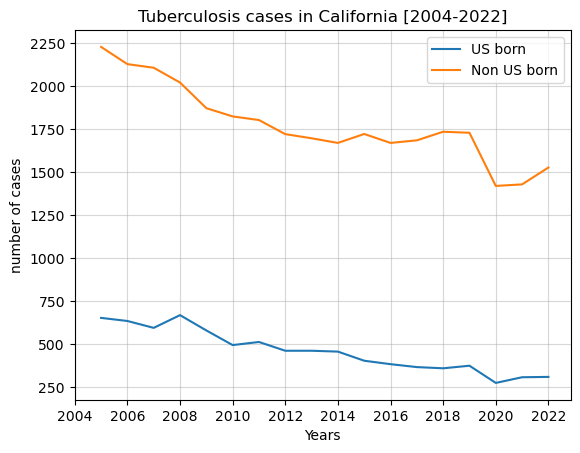

In [154]:
plt.plot("Year","Cases",data=data_us_born)
plt.plot("Year","Cases",data=data_nus_born)
plt.legend(["US born","Non US born"])
plt.xlabel("Years")
plt.ylabel("number of cases")
plt.xticks([2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.title("Tuberculosis cases in California [2004-2022]")
plt.grid(alpha=0.5)

In [155]:
data_agegroup=data.query("Category=='Age group' and Population!=0")
data_agegroup

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
154,155,2005,Age group,0-4,85.0,2589301.0,3.3
155,156,2005,Age group,45426,66.0,5361526.0,1.2
156,157,2005,Age group,15-24,281.0,5350616.0,5.3
157,158,2005,Age group,25-44,916.0,10621621.0,8.6
158,159,2005,Age group,45-64,846.0,8237571.0,10.3
...,...,...,...,...,...,...,...
257,258,2022,Age group,45426,31.0,5155611.0,0.6
258,259,2022,Age group,15-24,147.0,5504566.0,2.7
259,260,2022,Age group,25-44,422.0,10159721.0,4.2
260,261,2022,Age group,45-64,545.0,9383346.0,5.8


In [156]:
data_sex=data.query("Category=='Sex' and Population!=0")
data_sex

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
262,263,2005,Sex,Male,1747.0,17898283.0,9.8
263,264,2005,Sex,Female,1150.0,18087299.0,6.4
264,265,2006,Sex,Male,1666.0,18027444.0,9.2
265,266,2006,Sex,Female,1110.0,18219378.0,6.1
266,267,2007,Sex,Male,1649.0,18179624.0,9.1
267,268,2007,Sex,Female,1073.0,18372905.0,5.8
268,269,2008,Sex,Male,1654.0,18330671.0,9.0
269,270,2008,Sex,Female,1041.0,18525551.0,5.6
270,271,2009,Sex,Male,1498.0,18444224.0,8.1
271,272,2009,Sex,Female,967.0,18632980.0,5.2


In [157]:
data_F=data_sex.query("Strata=='Female'")
data_F

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
263,264,2005,Sex,Female,1150.0,18087299.0,6.4
265,266,2006,Sex,Female,1110.0,18219378.0,6.1
267,268,2007,Sex,Female,1073.0,18372905.0,5.8
269,270,2008,Sex,Female,1041.0,18525551.0,5.6
271,272,2009,Sex,Female,967.0,18632980.0,5.2
274,275,2010,Sex,Female,949.0,18781184.0,5.1
276,277,2011,Sex,Female,941.0,18938400.0,5.0
278,279,2012,Sex,Female,891.0,19110226.0,4.7
280,281,2013,Sex,Female,843.0,19242306.0,4.4
282,283,2014,Sex,Female,842.0,19383492.0,4.3


In [158]:
data_M=data_sex.query("Strata=='Male'")
data_M


,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
262,263,2005,Sex,Male,1747.0,17898283.0,9.8
264,265,2006,Sex,Male,1666.0,18027444.0,9.2
266,267,2007,Sex,Male,1649.0,18179624.0,9.1
268,269,2008,Sex,Male,1654.0,18330671.0,9.0
270,271,2009,Sex,Male,1498.0,18444224.0,8.1
273,274,2010,Sex,Male,1374.0,18582184.0,7.4
275,276,2011,Sex,Male,1379.0,18765193.0,7.3
277,278,2012,Sex,Male,1293.0,18945559.0,6.8
279,280,2013,Sex,Male,1319.0,19100336.0,6.9
281,282,2014,Sex,Male,1288.0,19261310.0,6.7


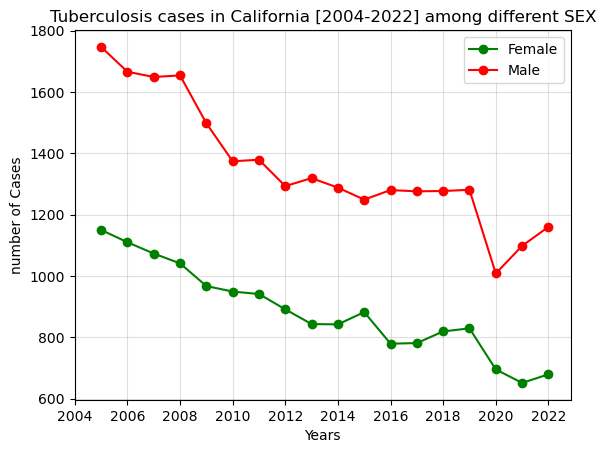

In [159]:
plt.plot('Year','Cases',"go-",data=data_F)
plt.plot('Year','Cases',"ro-",data=data_M)
plt.legend(["Female","Male"])
plt.xlabel("Years")
plt.ylabel("number of Cases")
plt.xticks([2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.title("Tuberculosis cases in California [2004-2022] among different SEX")
plt.grid(alpha=0.4)

In [160]:
data_total=data.query("Category=='Total' and Population!=0")
data_total

,_id,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
0,1,2005,Total,All cases,2897.0,35985582.0,8.1
1,2,2006,Total,All cases,2776.0,36246822.0,7.7
2,3,2007,Total,All cases,2722.0,36552529.0,7.4
3,4,2008,Total,All cases,2695.0,36856222.0,7.3
4,5,2009,Total,All cases,2466.0,37077204.0,6.7
5,6,2010,Total,All cases,2323.0,37363368.0,6.2
6,7,2011,Total,All cases,2320.0,37703593.0,6.2
7,8,2012,Total,All cases,2184.0,38055785.0,5.7
8,9,2013,Total,All cases,2162.0,38342642.0,5.6
9,10,2014,Total,All cases,2130.0,38644802.0,5.5


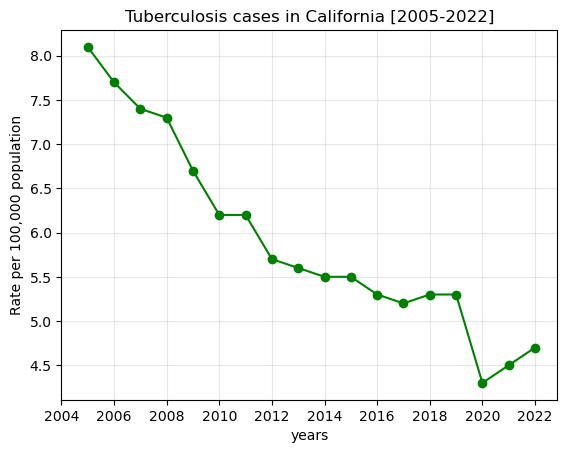

In [161]:
plt.plot("Year","Rate per 100,000 population","go-",data=data_total)
plt.xlabel("years")
plt.ylabel("Rate per 100,000 population")
plt.title("Tuberculosis cases in California [2005-2022]")
plt.xticks([2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.grid(alpha=0.3)